In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plot.band_plot import line_bar_plot

In [4]:
epsilon_values = [0.02, 0.04, 0.06, 0.08, 0.1]

In [11]:
attack_type = 'self_distance'
strategy = 'c_im_m_id_m_da'

In [12]:
file_dir = os.path.join('../results/',
                        strategy,
                        attack_type,
                        'epsilon_{:.2f}.csv')

In [13]:
df_list = [pd.read_csv(file_dir.format(epsilon)) for epsilon in epsilon_values]

In [14]:
for index, epsilon in enumerate(epsilon_values):
    df_list[index]['epsilon'] = epsilon

In [15]:
df_zero = pd.read_csv('../results/c_im_c_id_c_da/none/epsilon_0.0.csv')
df_zero['epsilon'] = 0.0

In [16]:
df_list.append(df_zero)

In [17]:
concat_df = pd.concat(df_list, axis=0)

In [18]:
concat_df['recall_percentage'] = concat_df['recall_count'] / np.minimum(concat_df['num_possible'], concat_df['k'])

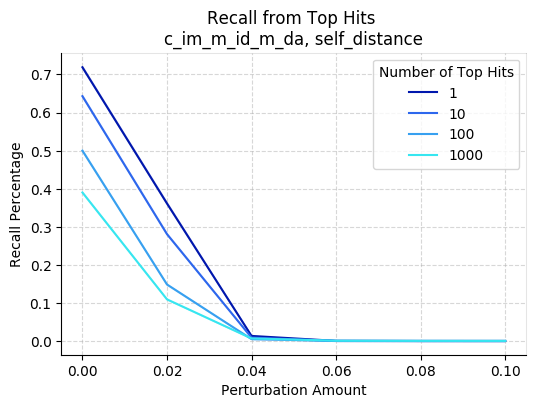

In [24]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df,
                        color_by='k',
                        use_bootstrap=False,
                        color='royalblue',
                        title='Recall from Top Hits \n{}, {}'.format(strategy, attack_type),
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount',
                        legend_title='Number of Top Hits',
                        colors=['#0017ad',
                                '#2d67ed',
                                '#37a0f0',
                                '#37e6f0'])
fig_dir = os.path.join('figures/',
                       attack_type,
                       strategy,
                       'sd_recall_percentage.pdf')
plt.savefig(fig_dir)

In [20]:
concat_df['discovery_rate'] = (concat_df['recall_count'] > 0).astype(int)

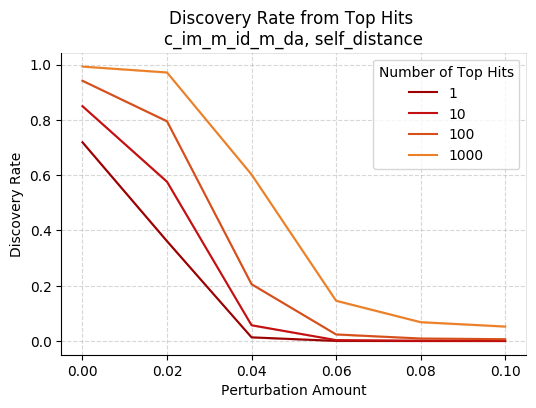

In [26]:
fig, ax = line_bar_plot(x='epsilon',
                        y='discovery_rate',
                        data=concat_df,
                        color_by='k',
                        use_bootstrap=False,
                        color='royalblue',
                        title='Discovery Rate from Top Hits \n{}, {}'.format(strategy, attack_type),
                        ylabel='Discovery Rate',
                        xlabel='Perturbation Amount',
                        legend_title='Number of Top Hits',
                        colors=['#9c0000',
                                '#c41010',
                                '#d64f1a',
                                '#eb8028'])
fig_dir = os.path.join('figures/',
                       attack_type,
                       strategy,
                       'discovert_rate.pdf')
plt.savefig(fig_dir)